In [1]:
import pyramses
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
    
def PV_curve(X,y):

    '''
    X = operating points generated through ARTERE
    y = percentage to be changed in CHGPRM
    
    '''



    case = pyramses.cfg() # Create a new scenario
    case.addData('dyn_B.dat') # Dynamic data file
    case.addData(X) # Power-flow (static) data
    case.addData('settings1.dat') # Solver settings
    case.addObs("obs.dat") # File with the variables to be saved for offline analysis
    case.addTrj("out.trj") # File for saving the variables for offline analysis
    case.addDst('infinite.dst') # Description of disturbance
    Thorizon = 3000

    ram = pyramses.sim() # Create a new simulator instance
    ret = ram.execSim(case,0) # Start simulation paused at t=0
    ram.addDisturb(5.000, 'CHGPRM INJ L_01 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_01 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_02 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_02 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_03 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_03 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_04 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_04 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_05 P0 'r"%s"% y + ' % 600')
    ram.addDisturb(5.000, 'CHGPRM INJ L_05 P0 'r"%s"% y + ' % 600')
    try:
        ret = ram.contSim(Thorizon) # Run simulation
    except:
        print(ram.getLastErr())

    try:
        ram.endSim()
        ret = ram.contSim(Thorizon+1) # Run simulation
    except:
        print(ram.getLastErr())

    ext = pyramses.extractor(case.getTrj())

    v = ext.getBus('1044').mag
    P1 = ext.getInj('L_01').P
    P2 = ext.getInj('L_02').P
    P3 = ext.getInj('L_03').P
    P4 = ext.getInj('L_04').P
    P5 = ext.getInj('L_05').P
    P = P1.value + P2.value + P3.value + P4.value + P5.value
    fig=plt.figure(figsize=(9,6), dpi= 300, facecolor='w', edgecolor='k')
    plt.plot(P, v.value, 'b', label='PV-Curve for BUS-1044')
    plt.ylabel('V (pu)')
    plt.xlabel('P (pu)')
    plt.legend(loc='upper right')
    #plt.xticks(np.arange(0, 160, 15))
    #plt.yticks(np.arange(0.85, 1.05, 0.05))
    #plt.ylim(0.83, 1.07)
    #plt.grid(b=True, which='major', color='#666666', linestyle='-')
    #plt.title('Fig 9 of [1]')
    plt.show()
    
    
    
#     GET VOLTAGE MAGNITUDE FOR ALL BUSES
#     ===================================

    bus_name = ram.getAllCompNames("BUS")

    valu = []
    main = []

    class dataframe:
        def __init__(self,bus_name):
            self.busName = bus_name


        def V_mag(self):

            for i in self.busName:
                a = ext.getBus(i).mag
                main.append((a))

            return (main)

        def vu(self):

            val = self.V_mag()

            for i in range(0,len(self.busName)):

                mag=val[i].value
                valu.append(mag)

        def make_df(self):

            y = self.vu()
            df = pd.DataFrame(valu)
            df = df.T
            df.columns = self.busName
            df['Time'] = main[0].time
            df.set_index("Time", inplace = True)
            return df

    r = dataframe(bus_name)
    vol_mag = r.make_df()
    vol_mag['power'] = P
    vol_mag.head()
    
    
    return(vol_mag)


In [4]:
list_of_files = []
for j in range(1,5):
    list_files = ('If_B'+r"%s"% j+'.DAT')
    list_of_files.append(list_files)

ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  348.9820         Voltage out of bounds at bus g6 :  0.49
ERROR CALL FROM Load records


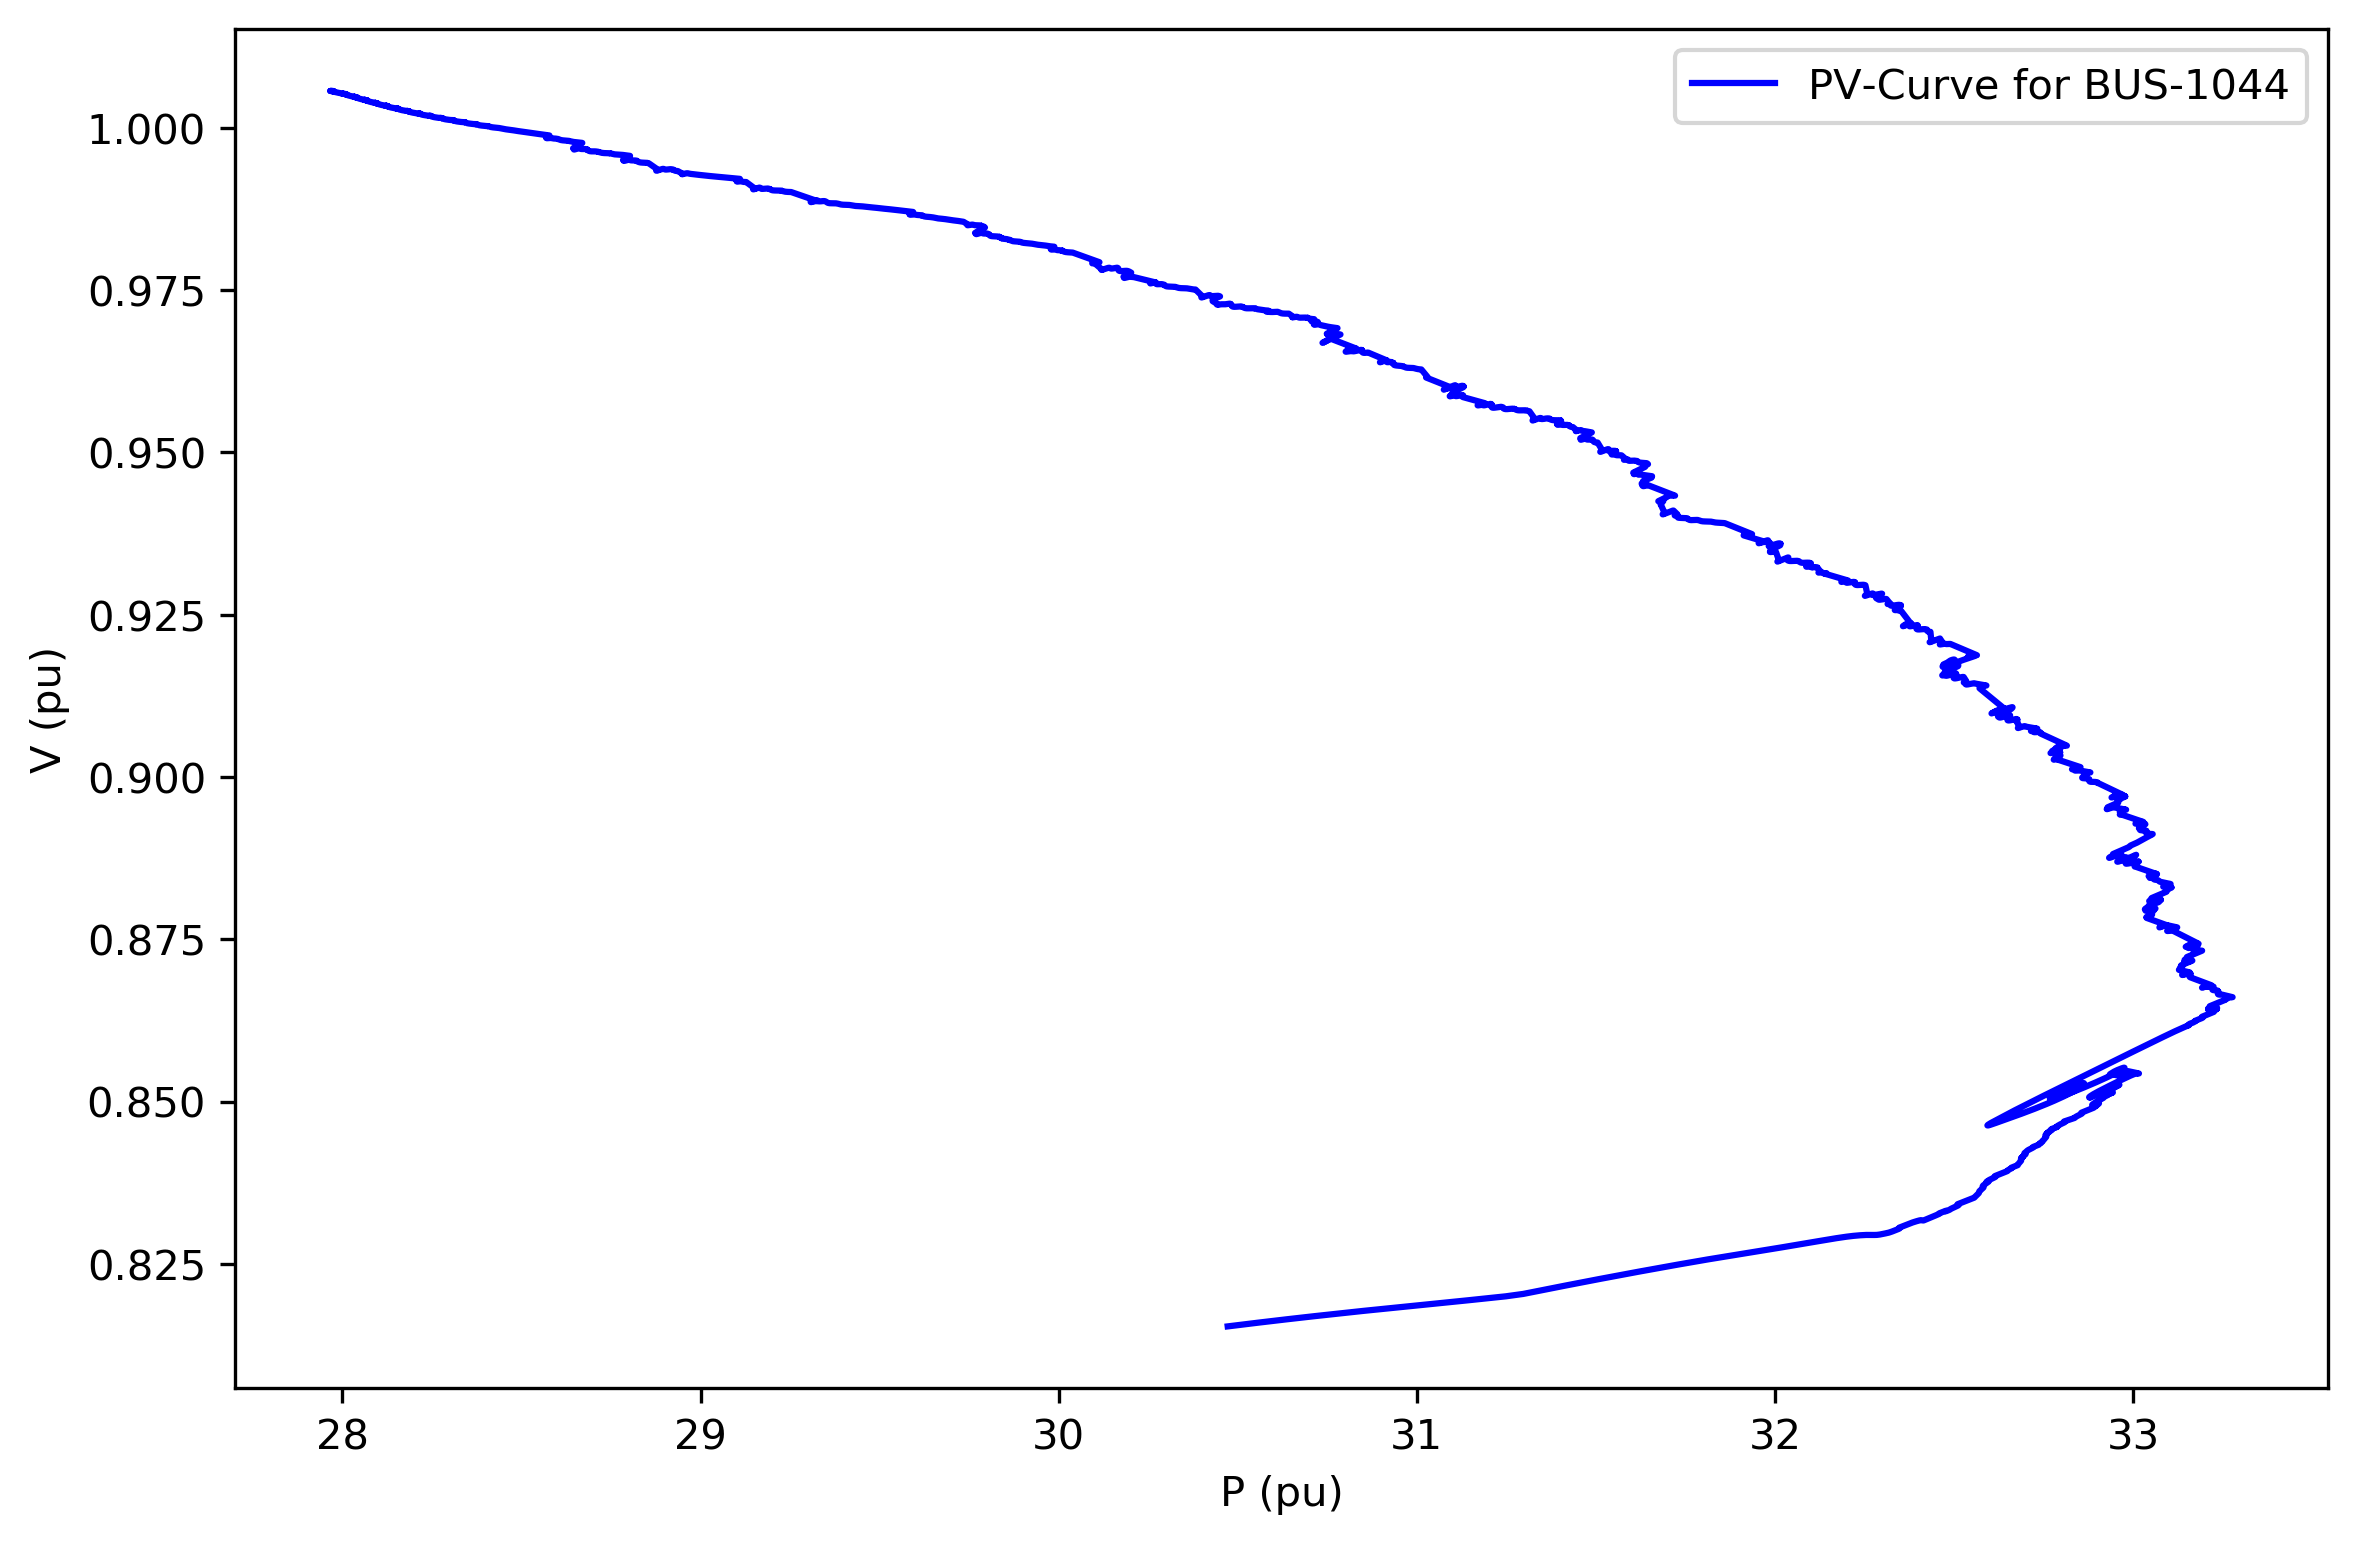

ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  345.2220         Voltage out of bounds at bus g6 :  0.50
ERROR CALL FROM Load records


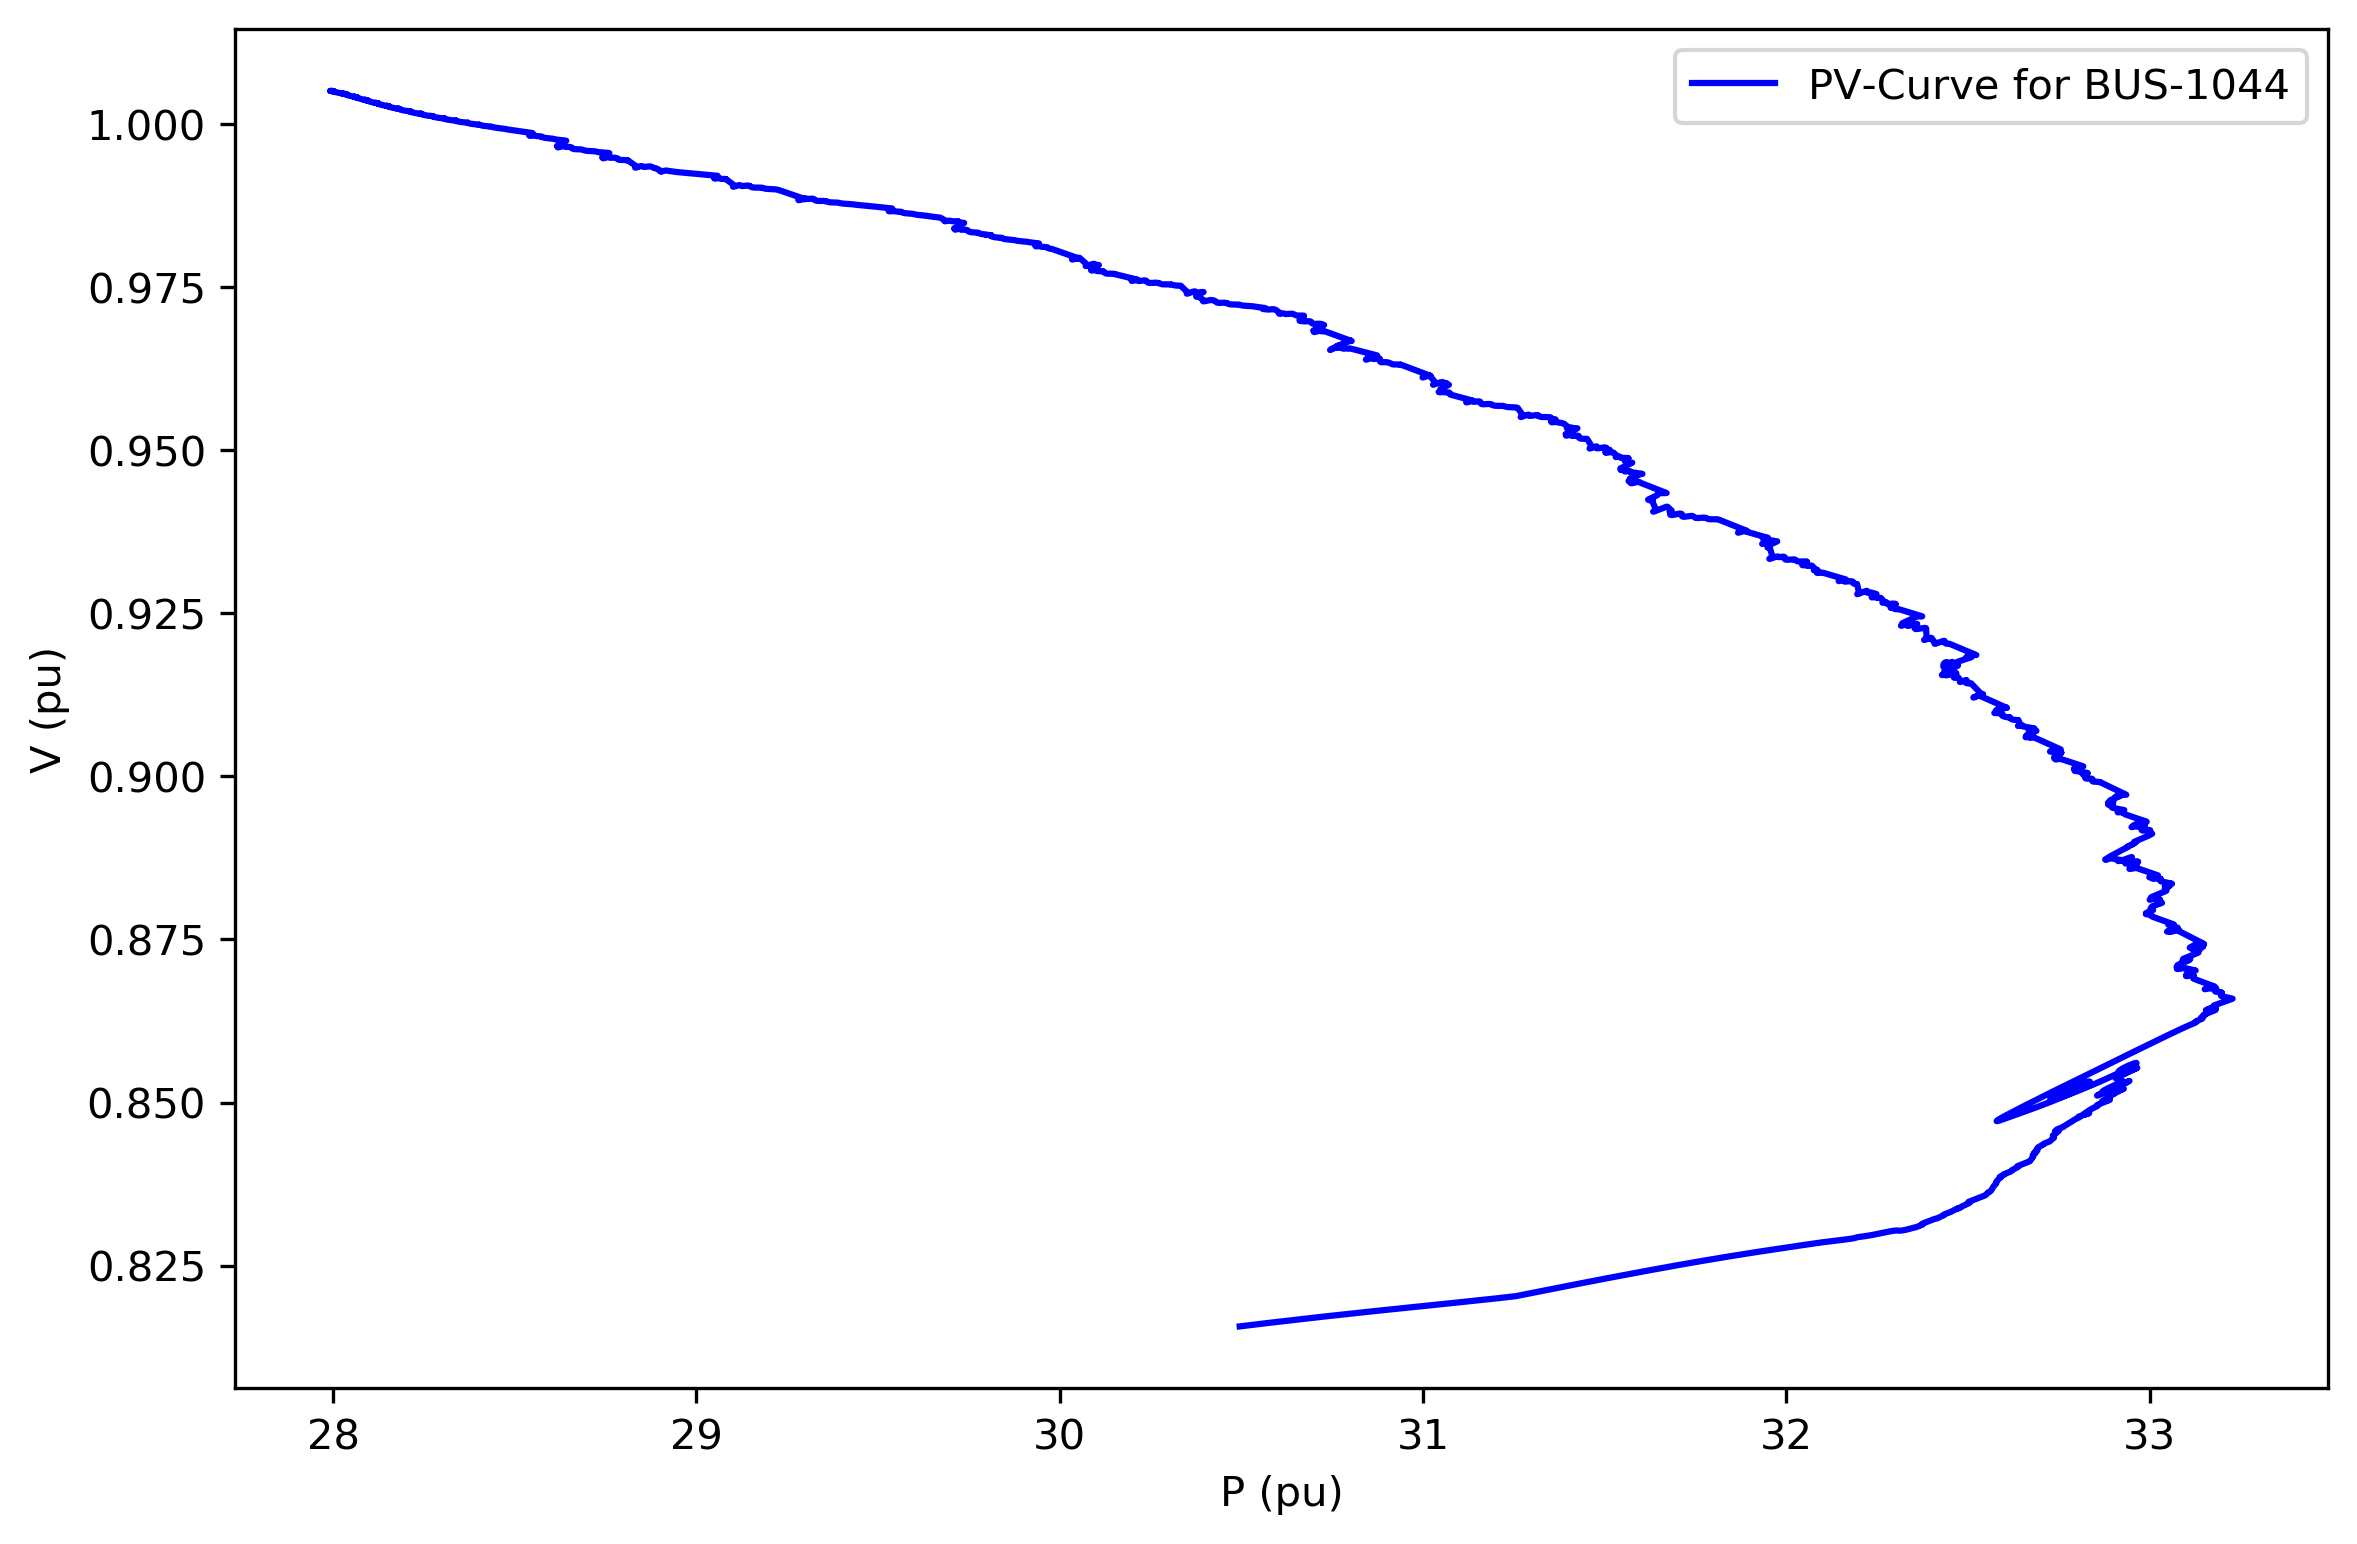

ERROR CALL FROM DCTL sim_minmaxvolt Voltages t =  345.2220         Voltage out of bounds at bus g6 :  0.50
ERROR CALL FROM Load records


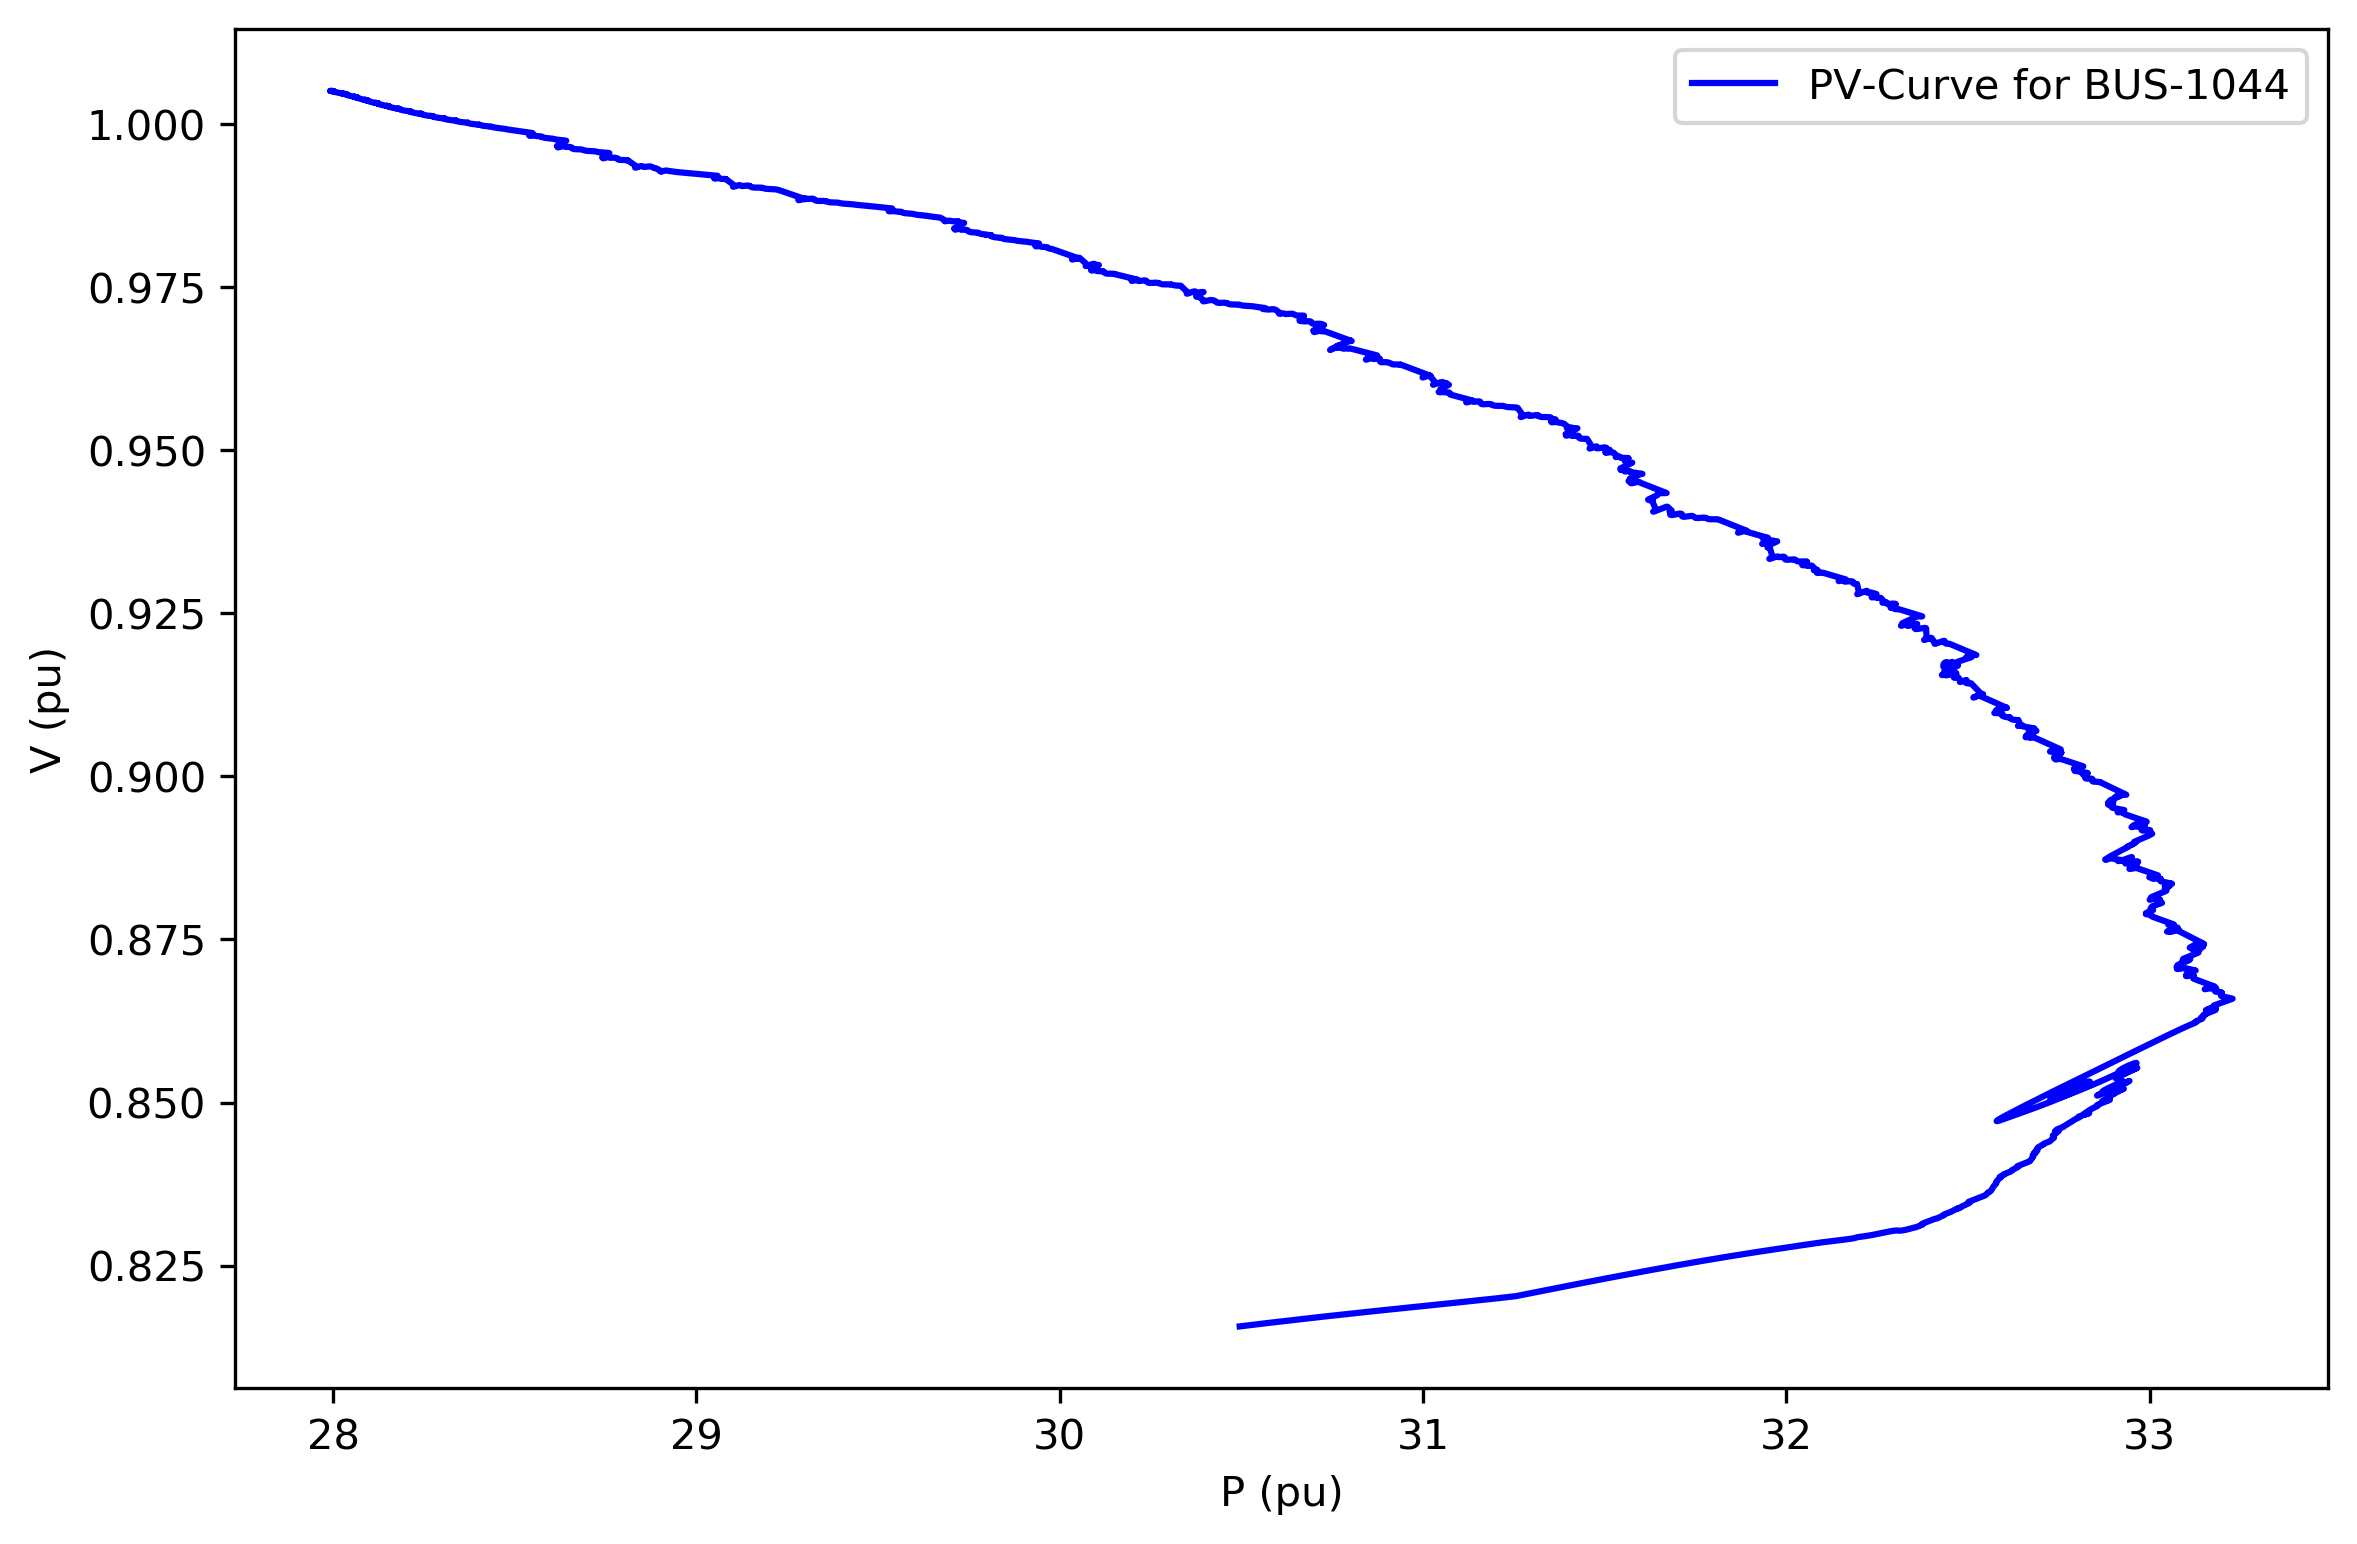

In [5]:

vol_mag = []
for i in range(0,3):                      # Here first five records are generated out of 720 operating point
    vol_data = PV_curve(list_of_files[i],50)   # increase load by 50%
    vol_mag.append(vol_data)
    